# Agrupamiento
Un algoritmo de agrupamiento (en inglés, clustering) es un procedimiento de agrupación de una serie de vectores de acuerdo con un criterio. Esos criterios son por lo general distancia o similitud. La cercanía se define en términos de una determinada función de distancia, como la euclídea, aunque existen otras más robustas o que permiten extenderla a variables discretas. La medida más utilizada para medir la similitud entre los casos es la matriz de correlación entre los nxn casos. Sin embargo, también existen muchos algoritmos que se basan en la maximización de una propiedad estadística llamada verosimilitud.

## Análisis del Problema
Se desea agrupar las películas en 3 grupos partir de las características presentadas más 
adelante en este enunciado, para esto se obtuvieron 6820 películas entre los años 1986
2016 del sitio web IMDb.
![Autos ROC](http://ajn1.com.br/wp-content/uploads/2017/08/20170102-cinema.jpg)

## Entendimiento de los Datos

El conjunto de datos contiene las siguientes variables:

- budget: - El presupuesto de una película. Algunas películas no tienen esto, por lo que aparece como 0. 
- company: - La productora .
- Fcountry: - País de origen.
- director: - El director.
- genre: - Género principal de la película.
- gross: - Los ingresos de la película. 
- name: - Nombre de la película.
- name: - rating: - Clasificación de la película (R, PG, etc.).
- released: - Fecha de lanzamiento (YYYY-MM-DD).
- runtime: - Duración de la película.
- score: - Calificación de usuario de IMDb.
- votes: - Número de votos de los usuarios.
- star: - Actor principal / actriz. 
- writer: - Escritor de la película .
- year: - Año de lanzamiento.

## Exploración de los Datos

In [10]:
options(warn=-1)
#librerías utilizadas
library(lattice)
library(reshape2)
library(ggplot2)
library(qcc)

In [11]:
peliculas <-read.csv('data.csv')

str(peliculas)

'data.frame':	6820 obs. of  15 variables:
 $ budget  : int  8000000 6000000 15000000 18500000 9000000 6000000 25000000 6000000 9000000 15000000 ...
 $ company : Factor w/ 2179 levels "\"DIA\" Productions GmbH & Co. KG",..: 665 1683 1683 2068 2124 1159 1161 763 1683 1936 ...
 $ country : Factor w/ 57 levels "Argentina","Aruba",..: 56 56 56 56 56 54 54 56 56 56 ...
 $ director: Factor w/ 2759 levels "A.R. Murugadoss",..: 2200 1304 2652 1073 2129 1955 1214 590 1011 559 ...
 $ genre   : Factor w/ 17 levels "Action","Adventure",..: 2 5 1 1 2 7 2 7 5 7 ...
 $ gross   : int  52287414 70136369 179800601 85160248 18564613 138530565 12729917 8551228 40471663 40456565 ...
 $ name    : Factor w/ 6731 levels "'71","'night, Mother",..: 4671 1829 6210 299 1880 3911 2890 781 3969 5312 ...
 $ rating  : Factor w/ 13 levels "B","B15","G",..: 9 8 7 9 7 9 7 9 8 9 ...
 $ released: Factor w/ 2403 levels "1 01 2004","1 01 2014",..: 1186 187 578 750 47 2103 1591 1274 1637 526 ...
 $ runtime : int  89 103 110 1

In [12]:
peliculas$genre <-factor(peliculas$genre)
peliculas$runtime <-factor(peliculas$runtime)

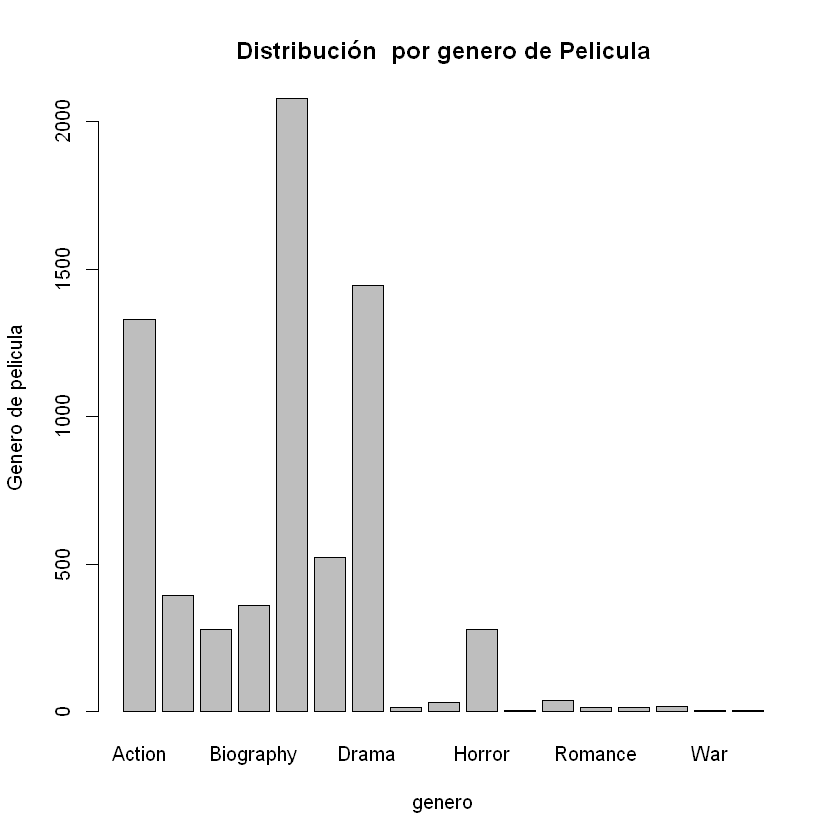

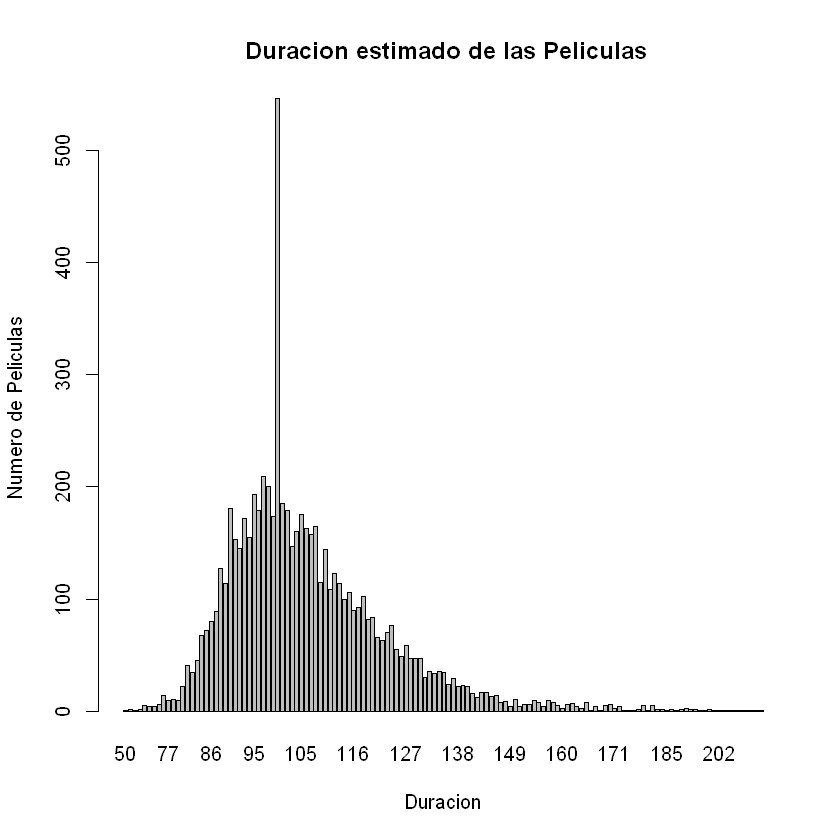

In [13]:
barplot(table(peliculas$genre),
        main = 'Distribución  por genero de Pelicula',
        xlab = 'genero',
        ylab = 'Genero de pelicula')

barplot(table(peliculas$runtime),
        main = ' Duracion estimado de las Peliculas',
        xlab = 'Duracion',
        ylab = 'Numero de Peliculas')

Using company, country, director, genre, name, rating, released, runtime, star, writer as id variables


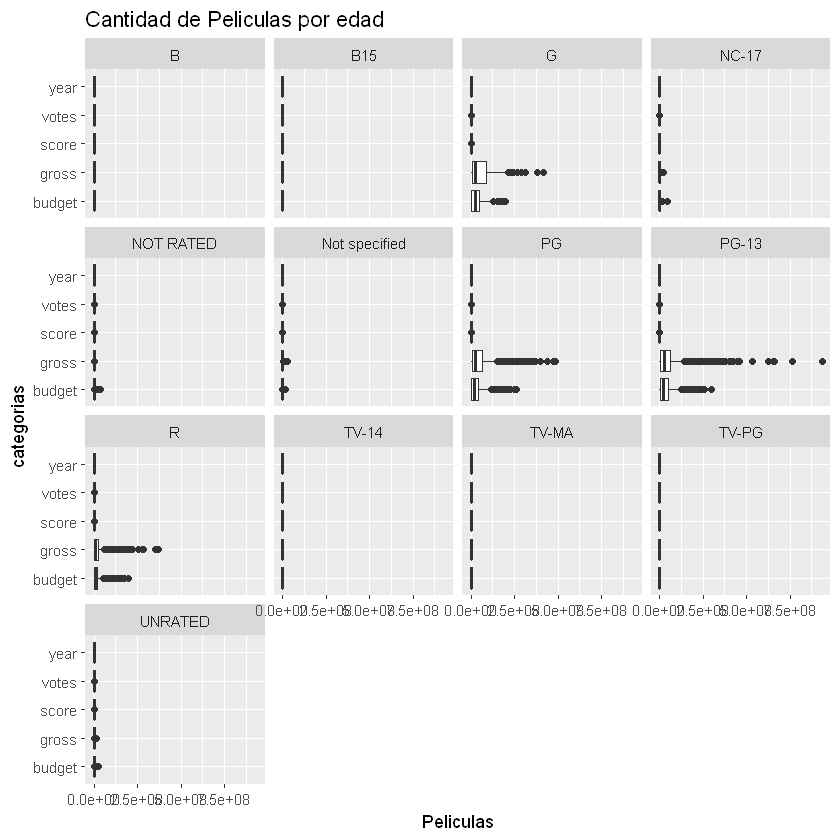

In [14]:
bxplt <- ggplot(data = melt(peliculas), aes(x=variable, y = value))
bxplt <- bxplt + geom_boxplot()
bxplt <- bxplt + facet_wrap(~rating)
bxplt <- bxplt + coord_flip()
bxplt <- bxplt + labs(x = 'categorias', y ='Peliculas')
bxplt <- bxplt + ggtitle('Cantidad de Peliculas por edad')
bxplt

## Modelo de Minería de Datos


In [15]:
modelo.agrupacion <- kmeans(peliculas[,c(1,6,10,11,13,15)], centers = 5)
peliculas$cluster <- modelo.agrupacion$cluster

#convertir la variable nueva a un factor
peliculas$cluster <- factor(peliculas$cluster)

   
Pareto chart analysis for table(peliculas$cluster)
      Frequency   Cum.Freq.  Percentage Cum.Percent.
  1 4219.000000 4219.000000   61.862170    61.862170
  5 1647.000000 5866.000000   24.149560    86.011730
  3  637.000000 6503.000000    9.340176    95.351906
  4  244.000000 6747.000000    3.577713    98.929619
  2   73.000000 6820.000000    1.070381   100.000000

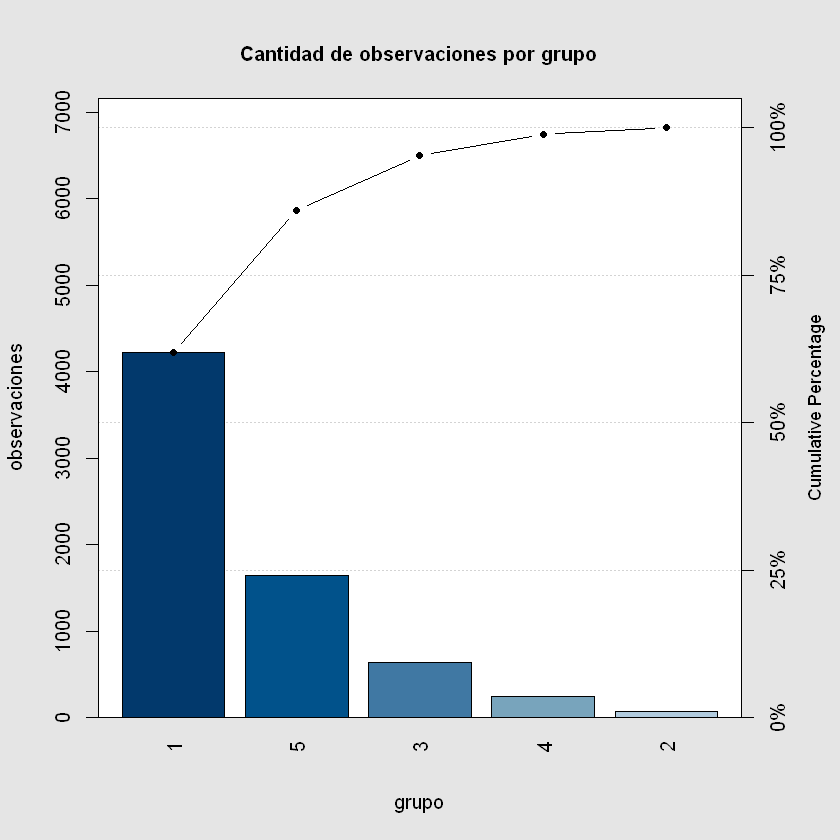

In [16]:
pareto.chart(table(peliculas$cluster),
             main = 'Cantidad de observaciones por grupo',
             xlab = 'grupo',
             ylab = 'observaciones')

In [17]:
by(peliculas, peliculas$cluster, summary)

peliculas$cluster: 1
     budget                                  company          country    
 Min.   :       0   Paramount Pictures           :  77   USA      :2635  
 1st Qu.:       0   Universal Pictures           :  77   UK       : 543  
 Median :       0   New Line Cinema              :  75   France   : 233  
 Mean   : 5861681   Columbia Pictures Corporation:  65   Canada   : 125  
 3rd Qu.:10000000   Warner Bros.                 :  64   Germany  :  76  
 Max.   :42000000   Metro-Goldwyn-Mayer (MGM)    :  52   Australia:  67  
                    (Other)                      :3809   (Other)  : 540  
              director          genre          gross         
 Woody Allen      :  30   Comedy   :1408   Min.   :      70  
 Richard Linklater:  15   Drama    :1108   1st Qu.:  460216  
 Bruce Beresford  :  14   Action   : 533   Median : 2921738  
 Pedro Almodóvar  :  14   Crime    : 371   Mean   : 6609282  
 Spike Lee        :  13   Biography: 247   3rd Qu.:10434106  
 Robert Altman 